<a href="https://colab.research.google.com/github/Mohan-this-side/Hackathon_NEU/blob/main/Stay_or_stray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np

# Loading Data:

In [9]:
#log_test = pd.read_csv("/log_test.csv")

In [10]:
#log_test.head()


In [11]:
#log_train = pd.read_csv("/log_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Hackathon_NEU/stay-or-stray/test.csv")

In [12]:
train =pd.read_csv("/content/drive/MyDrive/Hackathon_NEU/stay-or-stray/train.csv")

In [13]:
train.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
0,7054.0,2.015152,0.0,32.0,NaN,4.0,NaN,NaN,7.0,6.0,...,0.0,NaN,NaN,1.0,1.0,1.0,3.0,2.0,NaN,1
1,147131.0,1.000000,NaN,2.0,NaN,NaN,0.0,NaN,6.0,5.0,...,NaN,NaN,0.0,3.0,1.0,1.0,2.0,10.0,NaN,1
2,132068.0,1.000000,NaN,1.0,NaN,2.0,NaN,0.0,9.0,1.0,...,NaN,NaN,0.0,1.0,1.0,2.0,2.0,4.0,NaN,1
3,85195.0,2.071429,0.0,1.0,NaN,2.0,NaN,NaN,8.0,7.0,...,NaN,NaN,0.0,2.0,2.0,1.0,4.0,2.0,NaN,1
4,191948.0,2.000000,NaN,2.0,0.0,2.0,NaN,NaN,14.0,2.0,...,0.0,0.0,NaN,2.0,2.0,1.0,2.0,6.0,0.0,1


# Overview:

In [14]:
train.shape

(84377, 141)

In [15]:
test.shape

(35982, 140)

In [16]:
test.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139
0,17547.0,1.272727,0.0,1.0,0.0,3.0,0.0,0.0,7.0,26.0,...,NaN,NaN,NaN,0.0,2.0,6.0,2.0,4.0,3.0,NaN
1,140449.0,1.000000,0.0,1.0,NaN,1.0,NaN,0.0,8.0,4.0,...,0.0,0.0,NaN,0.0,3.0,2.0,2.0,2.0,5.0,NaN
2,182658.0,2.000000,NaN,2.0,NaN,2.0,NaN,0.0,64.0,2.0,...,NaN,NaN,NaN,NaN,2.0,4.0,1.0,1.0,7.0,0.0
3,149652.0,1.000000,0.0,1.0,NaN,1.0,0.0,0.0,9.0,9.0,...,NaN,NaN,NaN,NaN,3.0,1.0,1.0,2.0,7.0,NaN
4,106304.0,2.000000,NaN,2.0,NaN,3.0,NaN,0.0,1.0,6.0,...,NaN,NaN,NaN,0.0,1.0,2.0,2.0,2.0,2.0,0.0


In [17]:
train.isnull().sum()

ID         465
X1         418
X2       59198
X3         431
X4       59246
         ...  
X136       410
X137       448
X138       411
X139     59396
label        0
Length: 141, dtype: int64

In [18]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total Missing Values', 'Percent of Missing values'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [19]:
missing_data(train)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
Total Missing Values,465,418,59198,431,59246,430,59240,59105,410,369,...,59293,59192,59010,441,392,410,448,411,59396,0
Percent of Missing values,0.551098,0.495396,70.15893,0.510803,70.215817,0.509618,70.208706,70.04871,0.485914,0.437323,...,70.271519,70.151819,69.93612,0.522654,0.464582,0.485914,0.53095,0.4871,70.393591,0.0
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [20]:
missing_data(test)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139
Total Missing Values,0,167,25329,179,25224,177,25148,25249,178,182,...,25264,25134,25297,25252,192,199,189,193,188,25257
Percent of Missing values,0.0,0.464121,70.39353,0.497471,70.101718,0.491913,69.890501,70.171197,0.494692,0.505808,...,70.212884,69.851592,70.304597,70.179534,0.5336,0.553054,0.525263,0.536379,0.522483,70.19343
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [21]:
train.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
count,83912.000000,83959.000000,25179.0,83946.000000,25131.0,83947.000000,25137.0,25272.0,83967.000000,84008.000000,...,25084.0,25185.0,25367.0,83936.000000,83985.000000,83967.000000,83929.000000,83966.000000,24981.0,84377.000000
mean,100386.093098,1.585512,0.0,11.740988,0.0,1.906763,0.0,0.0,9.415139,9.026486,...,0.0,0.0,0.0,2.381040,2.567792,2.254326,2.334092,5.735965,0.0,0.792728
std,57993.333045,0.535283,0.0,34.643444,0.0,1.036347,0.0,0.0,17.288043,15.491942,...,0.0,0.0,0.0,2.050817,2.086498,1.989084,2.029105,2.988488,0.0,0.405355
min,5.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000
25%,50010.250000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,3.000000,3.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,3.000000,0.0,1.000000
50%,100614.000000,2.000000,0.0,2.000000,0.0,2.000000,0.0,0.0,6.000000,6.000000,...,0.0,0.0,0.0,2.000000,2.000000,2.000000,2.000000,6.000000,0.0,1.000000
75%,150620.250000,2.000000,0.0,6.000000,0.0,2.000000,0.0,0.0,9.000000,9.000000,...,0.0,0.0,0.0,3.000000,3.000000,2.000000,2.000000,8.000000,0.0,1.000000
max,200906.000000,7.000000,0.0,3605.000000,0.0,13.000000,0.0,0.0,487.000000,449.000000,...,0.0,0.0,0.0,83.000000,87.000000,82.000000,73.000000,30.000000,0.0,1.000000


In [22]:
test.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139
count,35982.000000,35815.000000,10653.0,35803.000000,10758.0,35805.000000,10834.0,10733.0,35804.000000,35800.000000,...,10718.0,10848.0,10685.0,10730.0,35790.000000,35783.000000,35793.000000,35789.000000,35794.00000,10725.0
mean,100392.184036,1.585217,0.0,11.605508,0.0,1.909035,0.0,0.0,9.465786,8.822291,...,0.0,0.0,0.0,0.0,2.376865,2.536428,2.260051,2.317863,5.73638,0.0
std,58027.131420,0.535552,0.0,31.921172,0.0,1.029380,0.0,0.0,19.158626,15.000416,...,0.0,0.0,0.0,0.0,2.044633,2.065513,1.977490,2.010826,2.98782,0.0
min,6.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.00000,0.0
25%,50244.250000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,3.000000,3.000000,...,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,3.00000,0.0
50%,99943.500000,2.000000,0.0,2.000000,0.0,2.000000,0.0,0.0,6.000000,6.000000,...,0.0,0.0,0.0,0.0,2.000000,2.000000,2.000000,2.000000,6.00000,0.0
75%,150830.750000,2.000000,0.0,5.000000,0.0,2.000000,0.0,0.0,9.000000,9.000000,...,0.0,0.0,0.0,0.0,3.000000,3.000000,2.000000,2.000000,8.00000,0.0
max,200902.000000,4.000000,0.0,954.000000,0.0,12.000000,0.0,0.0,1486.000000,481.000000,...,0.0,0.0,0.0,0.0,48.000000,67.000000,52.000000,44.000000,24.00000,0.0


# Feature correlation:

# Featuere Engineering:

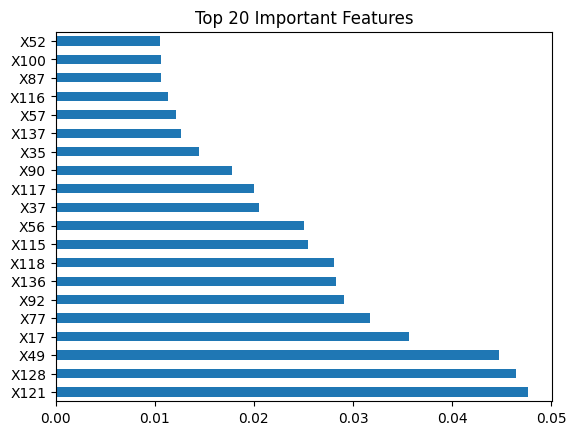

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame and it's already loaded
# Remove rows where the target variable is NaN
train_clean = train.dropna(subset=['label'])

# Separate features and target variable after dropping NaN in target
X = train_clean.drop(['label', 'ID'], axis=1) #features
y = train_clean['label']              #target

# Initialize the SimpleImputer with your chosen strategy
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent' for mode

# Fit the imputer and transform the dataset
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame (optional, for convenience)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Initialize the IterativeImputer
#imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer and transform the dataset
#X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame (optional, for convenience)
#X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Initialize the KNN Imputer for the features
#imputer = KNNImputer(n_neighbors=5)

# Fit the imputer and transform the features, replacing NaN values with imputed values
#X_imputed = imputer.fit_transform(X)

# Convert the imputed data back into a DataFrame (useful for further operations)
#X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.3, random_state=42)

# Initialize the model
rf = RandomForestClassifier(n_estimators=300, random_state=42)

# Fit the model on your data
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a Series with feature names as the index
feat_importances = pd.Series(importances, index=X_train.columns)

# Plot the most important features
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Top 20 Important Features')
plt.show()


In [33]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")


Accuracy of the Random Forest model: 0.88


# SMOTE:

In [25]:
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


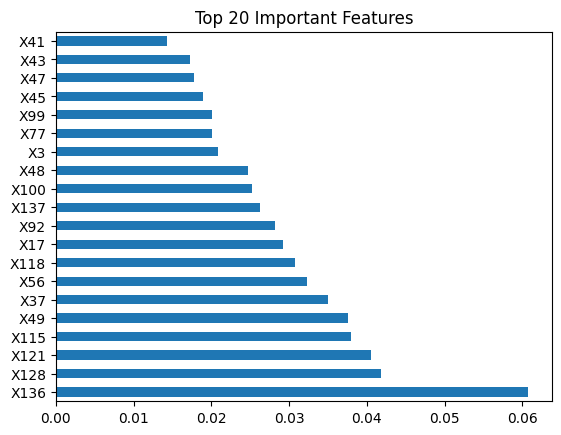

Accuracy of the Random Forest model: 0.87


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming X_imputed_df and y are already defined

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the model
rf = RandomForestClassifier(n_estimators=300, random_state=42)

# Fit the model on the balanced training data
rf.fit(X_train_smote, y_train_smote)

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a Series with feature names as the index
feat_importances = pd.Series(importances, index=X_train_smote.columns)

# Plot the most important features
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Top 20 Important Features')
plt.show()

# Predict the labels for the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")


Confusion Matrix:
[[ 3175  2049]
 [ 1216 18874]]


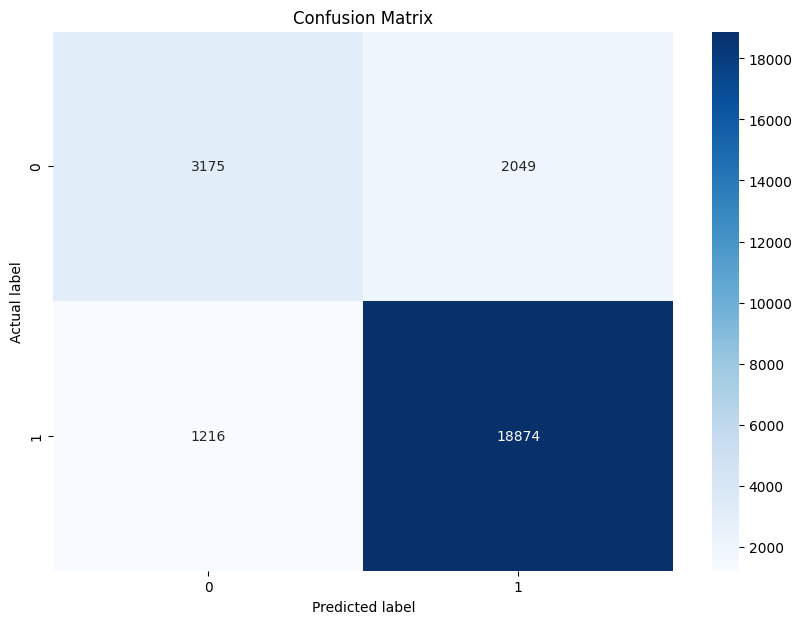

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming the rest of your code is unchanged and comes before this

# Predict the labels for the test set
y_pred = rf.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In the following code:

param_grid defines a set of hyperparameters to try.
GridSearchCV will perform a 3-fold cross-validation.
n_jobs = -1 tells the grid search to use all available cores on your machine for parallel computation.
verbose = 2 will display more information during the training process.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Create the parameter grid based on the results of random search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters
print("Best Parameters found: ")
print(grid_search.best_params_)

# Use the best parameters to fit the model
best_grid = grid_search.best_estimator_

# Predict the labels for the test set
y_pred = best_grid.predict(X_test)

# Calculate the accuracy and print it out
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned Random Forest model: {accuracy:.2f}")


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
print("Best Parameters found: ")
print(grid_search.best_params_)

# Use the best parameters to fit the model
best_grid = grid_search.best_estimator_

# Predict the labels for the test set
y_pred = best_grid.predict(X_test)

# Calculate the accuracy and print it out
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned Random Forest model: {accuracy:.2f}")

In [ ]:
# Assuming 'test' is your DataFrame for testing and it's already loaded
# Also assuming that 'imputer' has been previously fitted on training data

# Convert the 'ID' column from float to int
test['ID'] = test['ID'].astype(int)

# Separate out the 'ID' column and features from the 'test' dataset
test_features = test.drop('ID', axis=1)

# Impute the 'test' dataset using the fitted SimpleImputer
# Note: We use .transform() here, NOT .fit_transform()
test_imputed = imputer.transform(test_features)

# Predict the labels using the trained and tuned Random Forest model (best_grid)
predicted_labels = best_grid.predict(test_imputed)

# Create a DataFrame with 'ID' and the predicted 'label'
results_df = pd.DataFrame({
    'ID': test['ID'],
    'label': predicted_labels
})

# Convert the 'ID' column to integer to match the original ID's format
results_df['ID'] = results_df['ID'].astype(int)

# Output the DataFrame with 'ID' and 'label'
# If you want to save to a CSV file:
results_df.to_csv('/content/drive/MyDrive/Hackathon_NEU/my_submission_rf_cv', index=False)

# If you want to display the first few rows of the DataFrame
print(results_df.head())


In [18]:
# Assuming 'test' is your DataFrame for testing and it's already loaded

# Convert the 'ID' column from float to int
test['ID'] = test['ID'].astype(int)

# Separate out the 'ID' column and features from the 'test' dataset
test_features = test.drop('ID', axis=1)

# Impute the 'test' dataset using the fitted SimpleImputer
# Note: We use .transform() here, NOT .fit_transform()
test_imputed = imputer.transform(test_features)

# Predict the labels using the trained Random Forest model
predicted_labels = rf.predict(test_imputed)

# Create a DataFrame with 'ID' and the predicted 'label'
results_df = pd.DataFrame({
    'ID': test['ID'],
    'label': predicted_labels
})

# Convert the 'ID' column to integer to match the original ID's format
results_df['ID'] = results_df['ID'].astype(int)

# Output the DataFrame with 'ID' and 'label'
# If you want to save to a CSV file:
results_df.to_csv('/content/drive/MyDrive/Hackathon_NEU/my_submission_5_rf_smote.csv', index=False)

# If you want to display the first few rows of the DataFrame
print(results_df.head())



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


       ID  label
0   17547      0
1  140449      1
2  182658      1
3  149652      1
4  106304      1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the submission files into DataFrames
submission1 = pd.read_csv('/content/drive/MyDrive/Hackathon_NEU/my_submission_3_rf.csv')
submission2 = pd.read_csv('/submission-1.csv')

# Ensure the 'ID' column is of integer type
submission1['ID'] = submission1['ID'].astype(int)
submission2['ID'] = submission2['ID'].astype(int)

# Merge the two DataFrames on the 'ID' column
merged_submissions = pd.merge(submission1, submission2, on='ID', suffixes=('_1', '_2'))

# Calculate the accuracy score
accuracy = accuracy_score(merged_submissions['label_1'], merged_submissions['label_2'])

# Print the accuracy score
print(f"The accuracy score between the two submissions is: {accuracy:.2f}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Hackathon_NEU/my_submission_3_rf.csv'